In [2]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

MAPE = 0.04182723372944981
MAE = 1920.2464579510104
MSE = 6157069.730638949


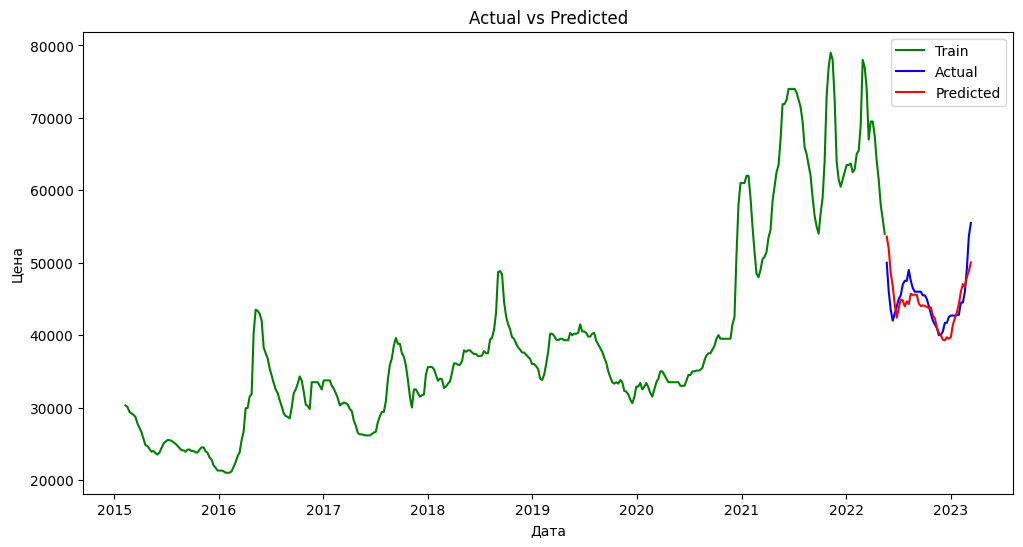

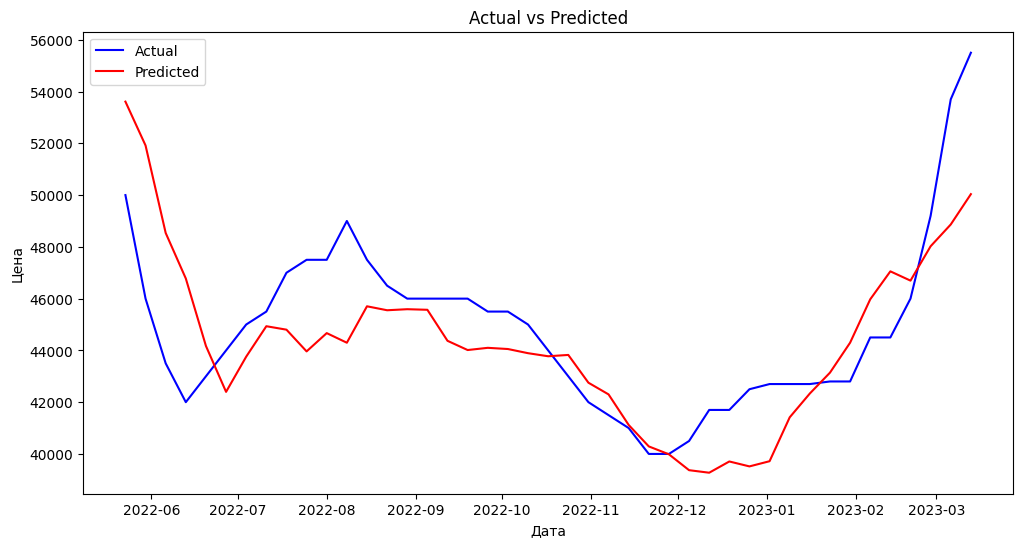

In [8]:
data = pd.read_csv('data/full.csv')

# Удаление последней строки, так как она будет содержать NaN в 'target'
data.dropna(inplace=True)


lag_days = 91  # Количество лагов
for lag in range(1, lag_days + 1):
    data[f'lag_{lag}'] = data['pfr'].shift(lag)


data.dt = pd.to_datetime(data.dt) # Приводим дату в тип pandas
data = data.set_index('dt') # Делаем колонку даты индексом, даем ей периодичность месяц ('MS' - month start)


t = list(data.columns)
t.remove('pfr')


# Разделение на признаки и целевую переменную
X = data[t]
y = data['pfr']

###############################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

###############################################################################################

model = CatBoostRegressor(iterations=5000, learning_rate=0.01, depth=6, verbose=0)
model.fit(X_train, y_train)
plt.show()

y_pred = model.predict(X_test)

###############################################################################################

# Оценка модели
print(f"MAPE = {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")
print(f"MSE = {mean_squared_error(y_test, y_pred)}")

###############################################################################################

plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Train', color='green')
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

###############################################################################################

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

In [ ]:
# good = {
#     'MAPE':{'qua':0, 'res':float('inf')},
#     'MAE':{'qua':0, 'res':float('inf')},
#     'MSE':{'qua':0, 'res':float('inf')}
# }

# for i in range(150):
    
#     data = pd.read_csv('data/full.csv')

#     lag_days = i  # Количество лагов
#     for lag in range(1, lag_days + 1):
#         data[f'lag_{lag}'] = data['pfr'].shift(lag)

#     t = list(data.columns)
#     t.remove('pfr')
#     t.remove('dt')

#     # Разделение на признаки и целевую переменную
#     X = data[t]
#     y = data['pfr']

#     ###############################################################################################

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

#     ###############################################################################################

#     model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=4, verbose=0)
#     model.fit(X_train, y_train)
#     plt.show()

#     y_pred = model.predict(X_test)

#     mape = mean_absolute_percentage_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)

#     if good['MAPE']['res'] > mape:
#         good['MAPE']['qua'] = i
#         good['MAPE']['res'] = mape

#     if good['MAE']['res'] > mae:
#         good['MAE']['qua'] = i
#         good['MAE']['res'] = mae

#     if good['MSE']['res'] > mse:
#         good['MSE']['qua'] = i
#         good['MSE']['res'] = mse

#     print('-----------------------')
#     print(i)
#     print(good)
#     print('-----------------------')



# print(good)

-----------------------
0
{'MAPE': {'qua': 0, 'res': 0.07412098089972051}, 'MAE': {'qua': 0, 'res': 3336.040852801694}, 'MSE': {'qua': 0, 'res': 20724924.467042774}}
-----------------------
-----------------------
1
{'MAPE': {'qua': 1, 'res': 0.05778641638324493}, 'MAE': {'qua': 1, 'res': 2605.034428621293}, 'MSE': {'qua': 1, 'res': 10068446.601342011}}
-----------------------
-----------------------
2
{'MAPE': {'qua': 2, 'res': 0.04786639090342815}, 'MAE': {'qua': 2, 'res': 2155.0844800084615}, 'MSE': {'qua': 2, 'res': 8358994.126042665}}
-----------------------
-----------------------
3
{'MAPE': {'qua': 3, 'res': 0.046755813556665964}, 'MAE': {'qua': 3, 'res': 2138.230084195173}, 'MSE': {'qua': 3, 'res': 7540869.599347168}}
-----------------------
-----------------------
4
{'MAPE': {'qua': 3, 'res': 0.046755813556665964}, 'MAE': {'qua': 3, 'res': 2138.230084195173}, 'MSE': {'qua': 3, 'res': 7540869.599347168}}
-----------------------
-----------------------
5
{'MAPE': {'qua': 3, 'res

C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)


-----------------------
98
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)


-----------------------
99
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
100
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
101
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
102
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
103
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
104
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
105
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
106
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
107
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
108
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
109
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
110
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
111
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
112
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
113
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
114
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
115
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
116
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
117
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
118
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
119
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
120
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
121
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
122
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
123
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
124
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
125
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
126
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
127
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
128
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
129
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
130
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
131
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
132
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
133
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
134
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
135
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
136
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
137
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
138
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
139
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
140
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
141
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
142
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
143
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
144
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
145
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
146
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
147
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
148
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------


C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}'] = data['pfr'].shift(lag)
C:\Users\Shark\AppData\Local\Temp\ipykernel_21520\4290595116.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

-----------------------
149
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}
-----------------------
{'MAPE': {'qua': 91, 'res': 0.03614292546956899}, 'MAE': {'qua': 91, 'res': 1625.0788875050312}, 'MSE': {'qua': 91, 'res': 4308221.69811282}}


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from catboost import CatBoostRegressor

# # Определение модели
# model = CatBoostRegressor()

# # Определение параметров для поиска
# param_grid = {
#     'iterations': [500, 1000, 5000],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'depth': [4, 6, 8, 10],
#     'verbose': [0]
# }

# # Сеточный поиск
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
# grid_search.fit(X_train, y_train)

# # Лучшие параметры
# print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1, 'verbose': 0}
